In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [19]:
df = pd.read_csv('StatewiseTestingDetails.csv')
df

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
8061,2020-12-04,West Bengal,6047279.0,NaN,NaN
8062,2020-12-05,West Bengal,6091668.0,NaN,NaN
8063,2020-12-06,West Bengal,6135854.0,NaN,NaN
8064,2020-12-07,West Bengal,6167307.0,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8066 entries, 0 to 8065
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8066 non-null   object 
 1   State         8066 non-null   object 
 2   TotalSamples  8066 non-null   float64
 3   Negative      4294 non-null   object 
 4   Positive      4866 non-null   float64
dtypes: float64(2), object(3)
memory usage: 315.2+ KB


In [23]:
df2

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
8061,2020-12-04,West Bengal,6047279.0,NaN,NaN
8062,2020-12-05,West Bengal,6091668.0,NaN,NaN
8063,2020-12-06,West Bengal,6135854.0,NaN,NaN
8064,2020-12-07,West Bengal,6167307.0,NaN,NaN


In [3]:
df1 = pd.read_csv('covid_19_india.csv')
df1

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
9286,9287,09/12/20,8:00 AM,Telengana,-,-,266120,1480,275261
9287,9288,09/12/20,8:00 AM,Tripura,-,-,32169,373,32945
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173


In [9]:
df1['State/UnionTerritory'].replace({"Chandigarh***":"Chandigarh",
                                     "Maharashtra***":"Maharashtra",
                                     'Punjab***':'Punjab',
                                     'Telangana***':'Telangana','Telengana***':'Telangana','Telengana':'Telangana'},inplace=True)

In [5]:
df1.to_csv("coviddata.csv")

In [8]:
groups = df1.groupby('State/UnionTerritory').agg({'Confirmed':'sum'}).sort_values(by='Confirmed',ascending=False).head(10)

<BarContainer object of 10 artists>

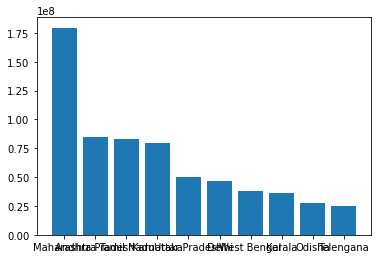

In [9]:
plt.bar(groups.Confirmed.index,groups.Confirmed.values)


In [13]:
list(groups.Confirmed.values)

[179450627,
 84815303,
 82789540,
 79354749,
 50283822,
 46445978,
 38349942,
 36407056,
 27395482,
 24886079]

# 